In [1]:
from kan import *
import torch
import pandas as pd

In [2]:
df1 = pd.read_csv("/Users/lpc_0066/Desktop/Dataset/その他/Volume of Distribution/VDss_dataset_uen.csv")
df1

,SMILES,MW,logP,VDss(L/kg),logVDss
0,CC(C)N(CCC(c1ccccc1)c1cc(CO)ccc1O)C(C)C,341.495,4.52530,2.410000,0.382017
1,O=C(OC1C[N+]2(CCCOc3ccccc3)CCC1CC2)C(O)(c1cccs...,484.663,4.66680,4.300000,0.633468
2,CC[C@H]1C2C[C@H]3[C@@H]4N(C)c5ccccc5[C@]45C[C@...,326.440,1.55450,4.000000,0.602060
3,C=CC[N+]12CCC34c5ccccc5N5/C=C6/C7CC8C9(CC[N+]8...,666.910,5.47560,0.320000,-0.494850
4,CCCS(=O)CCCN(CC)CC(O)COc1ccc(C#N)cc1,352.500,2.16868,1.800000,0.255273
...,...,...,...,...,...
2435,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,420.513,-1.60310,0.229087,-0.640000
2436,CCCCC[C@H](O)CC[C@@H]1[C@H]2Cc3cccc(OCC(=O)O)c...,390.520,3.58320,0.229087,-0.640000
2437,Cn1c(N)c(NC(=O)NCCN)c[n+]1CC1=C(C(=O)O)N2C(=O)...,667.711,-2.56860,0.169824,-0.770000
2438,CCCSc1nc(N[C@@H]2C[C@H]2c2ccc(F)c(F)c2)c2nnn([...,522.578,2.01370,1.258925,0.100000


In [3]:
df2 = pd.read_csv("/Users/lpc_0066/Desktop/Dataset/その他/materials_dataset_kaggle/Cleaned Metalearning_classification.csv")
df2 = df2.dropna()
df2

,Atomic Radius(Atomic unit),Expansion Coefficient,Electron Affinity(-ive),Conductivity,Yield Strength,Outcome
0,1.20,0.000,73.0,1.20,1213.355372,2.0
1,1.32,0.006,17.0,21.84,136.809524,1.0
2,1.33,0.008,16.0,28.14,179.362319,1.0
3,1.34,0.008,16.0,55.20,57.607167,1.0
4,1.32,0.008,16.0,47.76,59.913043,1.0
...,...,...,...,...,...,...
1994,1.33,0.008,69.0,3.60,14.515858,1.0
1995,1.33,0.007,68.0,3.90,14.515858,1.0
1996,1.33,0.008,70.0,5.00,26.192593,1.0
1997,1.36,0.009,78.0,1.84,8.661871,1.0


In [4]:
X1 = torch.tensor(df1.iloc[:, 1:-1].values)
y1 = torch.tensor(df1.iloc[:, -1].values)

In [5]:
X2 = torch.tensor(df2.iloc[:, :-1].values)
y2 = torch.tensor(df2.iloc[:, -1].values).reshape(-1, 1)

In [6]:
y2.shape

torch.Size([1919, 1])

cpu
checkpoint directory created: ./model
saving model version 0.0


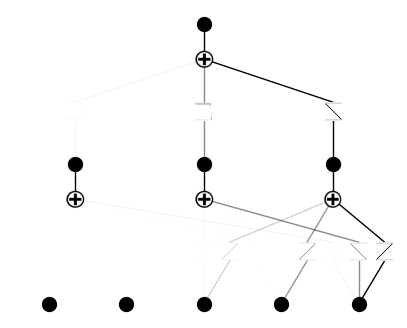

In [7]:
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[5,3,1], grid=3, k=2, seed=42, device=device)
model(X2)
model.plot()

In [8]:
from sklearn.model_selection import train_test_split

def generate_kan_dataset(X, y):
    """
    Generate dataset for kan.

    Args:
        X(nparray): tensor of train_input.
        y(nparray): tensor of train_label.
    Returns:
        dict: A dictionary containing train_input, train_label, test_input, test_label
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    dataset = {'train_input': [], 'test_input': [], 'train_label': [], 'test_label': []}

    # Convert lists to tensors
    dataset['train_input'] = torch.tensor(X_train)
    dataset['test_input'] = torch.tensor(X_test)
    dataset['train_label'] = torch.tensor(y_train).reshape(-1, 1)
    dataset['test_label'] = torch.tensor(y_test).reshape(-1, 1)

    return dataset

In [9]:
dataset = generate_kan_dataset(X2, y2)

/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_10522/584215959.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['train_input'] = torch.tensor(X_train)
/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_10522/584215959.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['test_input'] = torch.tensor(X_test)
/var/folders/ns/t11p9ts50f7481s5zt34wzzr0000gn/T/ipykernel_10522/584215959.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset['train_label'] = torch.tensor(y_train).reshape(-1, 1)
/var/f

In [10]:
dataset

{'train_input': tensor([[1.4400e+00, 6.0000e-03, 4.3000e+01, 3.6800e+00, 6.8718e+01],
         [1.4500e+00, 0.0000e+00, 7.7000e+01, 1.1600e+00, 1.8429e+01],
         [1.2700e+00, 6.0000e-03, 6.0000e+01, 2.8700e+00, 1.9200e+01],
         ...,
         [1.2900e+00, 9.0000e-03, 2.3000e+01, 0.0000e+00, 1.4700e+02],
         [1.3000e+00, 4.0000e-03, 5.2000e+01, 3.1200e+00, 1.4220e+02],
         [1.1500e+00, 1.0000e-02, 2.2000e+01, 1.7340e+01, 3.6338e+02]]),
 'test_input': tensor([[1.3100e+00, 4.0000e-03, 5.5000e+01, 5.3200e+00, 1.8876e+02],
         [1.4900e+00, 7.0000e-03, 6.2000e+01, 2.2000e+00, 1.3187e+01],
         [1.3200e+00, 5.0000e-03, 6.4000e+01, 2.5200e+00, 1.0008e+01],
         ...,
         [1.3000e+00, 1.1000e-02, 5.2000e+01, 5.9400e+00, 2.1044e+02],
         [1.3300e+00, 6.0000e-03, 3.3000e+01, 5.2800e+00, 1.4115e+02],
         [1.3000e+00, 3.0000e-03, 4.0000e+01, 7.9170e+01, 2.4835e+02]]),
 'train_label': tensor([[1.],
         [2.],
         [1.],
         ...,
         [1.]

In [11]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

In [12]:
# train the model
result = model.fit(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc))

description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 4.30e-01 | test_loss: 4.31e-01 | reg: 1.25e+01 | : 100%|█| 20/20 [00:02<00:00,  9.52it

saving model version 0.1


In [13]:
result

{'train_loss': [array(0.52977961),
  array(0.48863341),
  array(0.45520893),
  array(0.44831965),
  array(0.44585319),
  array(0.44437809),
  array(0.44173449),
  array(0.44022744),
  array(0.43716221),
  array(0.4358531),
  array(0.43519503),
  array(0.43508634),
  array(0.43489434),
  array(0.43442983),
  array(0.43191645),
  array(0.4307602),
  array(0.43049004),
  array(0.43042954),
  array(0.43016323),
  array(0.43006282)],
 'test_loss': [array(0.51599616),
  array(0.47789663),
  array(0.43822144),
  array(0.43060726),
  array(0.43355652),
  array(0.43048009),
  array(0.43167123),
  array(0.42680001),
  array(0.42540001),
  array(0.42644398),
  array(0.42691508),
  array(0.42776159),
  array(0.42684889),
  array(0.42648436),
  array(0.42757327),
  array(0.42923285),
  array(0.42916918),
  array(0.42900052),
  array(0.43007185),
  array(0.43076381)],
 'reg': [array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(0

In [14]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']

model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.257442500940464, c=1
fixing (0,0,1) with x, r2=0.11012404990811223, c=1
fixing (0,0,2) with x, r2=0.9961595457207156, c=1
fixing (0,1,0) with x, r2=0.6308356308104474, c=1
fixing (0,1,1) with x, r2=0.9043656437360104, c=1
fixing (0,1,2) with x, r2=0.06360613901395466, c=1
fixing (0,2,0) with x, r2=0.9208818863361077, c=1
fixing (0,2,1) with x, r2=0.9995937979887294, c=1
fixing (0,2,2) with x, r2=0.9999999944730205, c=1
fixing (0,3,0) with x, r2=0.9999789300272264, c=1
fixing (0,3,1) with x, r2=0.9997462691329525, c=1
fixing (0,3,2) with x, r2=0.9999694851934137, c=1
fixing (0,4,0) with x, r2=0.08742304701053864, c=1
fixing (0,4,1) with x, r2=0.9995817863844885, c=1
fixing (0,4,2) with x, r2=0.9999999999031174, c=1
fixing (1,0,0) with x, r2=0.042395274661771266, c=1
fixing (1,1,0) with x, r2=0.9832009246615023, c=1
fixing (1,2,0) with x, r2=0.13147432226464903, c=1
saving model version 0.2


In [16]:
from kan.utils import ex_round

result = ex_round(model.symbolic_formula()[0][0], 4)
result

0.0254*x_1 - 1.052*x_2 + 0.0097*x_3 - 0.0043*x_4 + 0.0004*x_5 + 0.7613